## Estandarización

### 1. Importamos las librerías necesarias.

In [99]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Estandarización
from sklearn.preprocessing import StandardScaler

# Configuración de los warning
import warnings
warnings.filterwarnings('ignore')

### 2. Abrimos el archivo con el que vamos a trabajar.

In [83]:
df = pd.read_csv("../archivos/bikes_final.csv", index_col = 0)
df.head(2)

,fecha,estacion,año,mes,dias_festivos,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,14.110847,18.18125,80.5833,10.749882,331,654,252.998318,lunes
1,2018-01-02,invierno,0,1,No Festivo,14.902598,17.68695,69.6087,16.652113,131,670,210.544378,martes


### 3. Estandarización de las columnas.

In [84]:
# seleccionamos las columnas que queremos estandarizar
numericas = df[['temperatura', 'sensacion_termica', 'humedad', 'velocidad_viento']]

In [85]:
numericas

,temperatura,sensacion_termica,humedad,velocidad_viento
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911
726,10.386653,12.75230,59.0000,10.416557
727,10.386653,12.12000,75.2917,8.333661
728,10.489153,11.58500,48.3333,23.500518


In [86]:
# iniciamos el método
scaler = StandardScaler()

In [87]:
# ajustamos nuestros datos 
scaler.fit(numericas)

StandardScaler()

In [88]:
# transformamos los datos
X_escaladas = scaler.transform(numericas)

In [89]:
# convertimos los resultados a un dataframe
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,temperatura,sensacion_termica,humedad,velocidad_viento
0,-0.827613,-0.680818,1.252343,-0.387833
1,-0.722069,-0.741507,0.480996,0.748899


In [90]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna temperatura es:  -2.5307001547620006e-16
La desviación estándar de la columna temperatura es: 1.0006856360078737
-------------------------------------------------------------
La media de la columna sensacion_termica es:  3.893384853480001e-17
La desviación estándar de la columna sensacion_termica es: 1.0006856360078737
-------------------------------------------------------------
La media de la columna humedad es:  -9.246789027015002e-16
La desviación estándar de la columna humedad es: 1.0006856360078737
-------------------------------------------------------------
La media de la columna velocidad_viento es:  7.786769706960002e-17
La desviación estándar de la columna velocidad_viento es: 1.0006856360078737
-------------------------------------------------------------


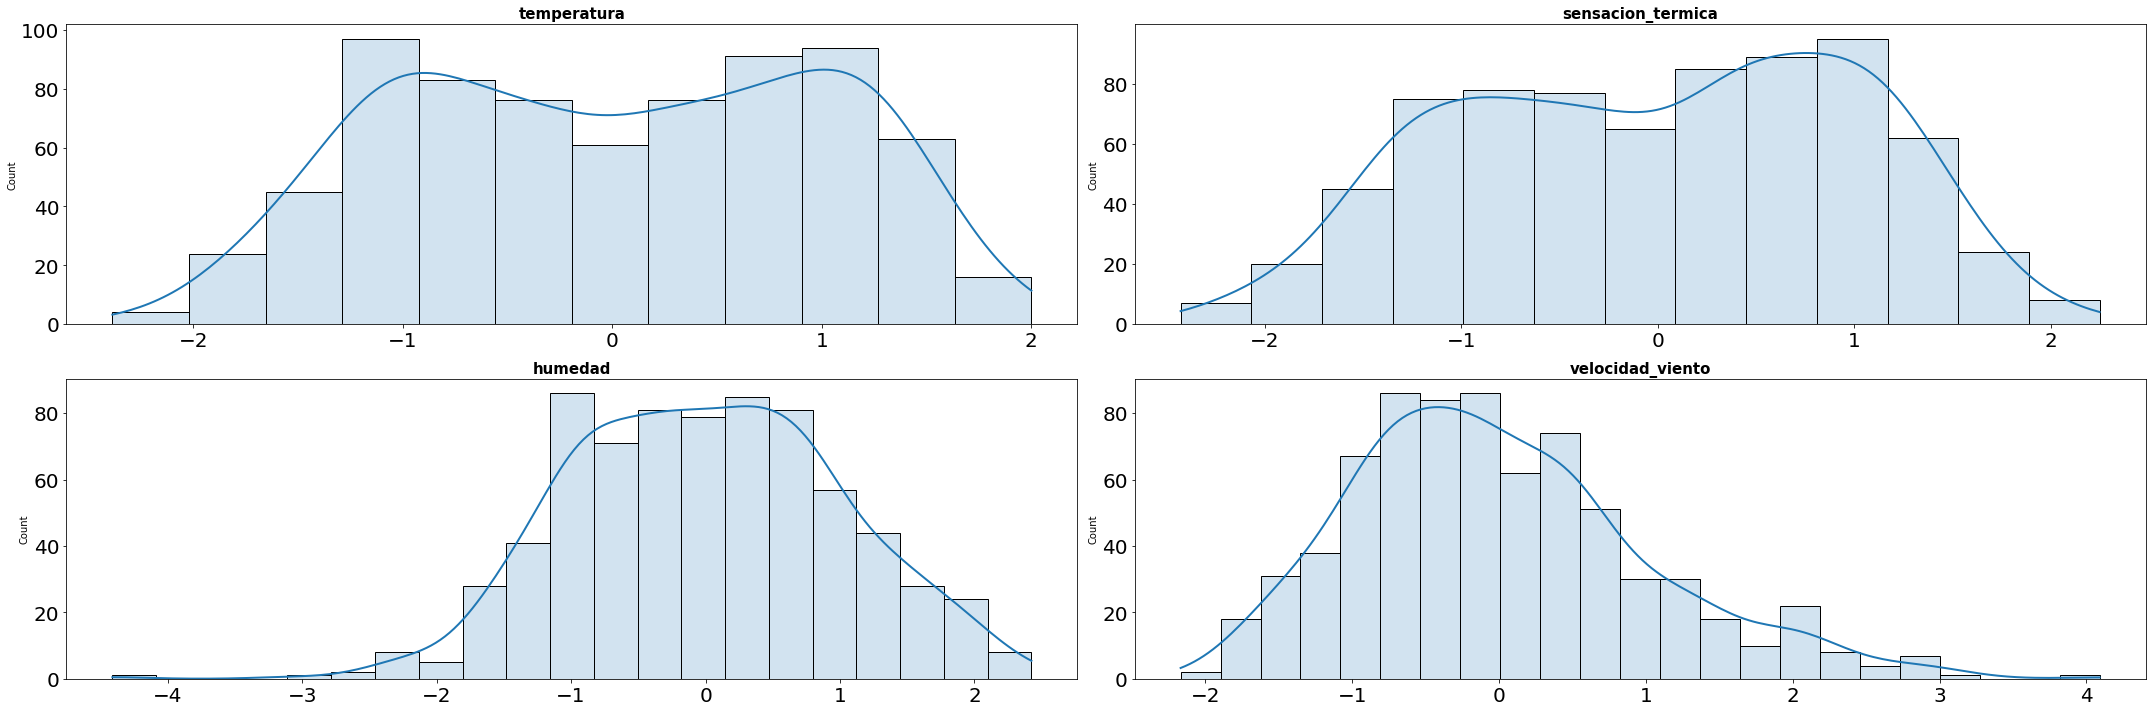

In [91]:
# Gráficas de las variables estandarizadas
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

### 4. Unimos las columnas estandarizadas al dataframe original.

In [92]:
df.reset_index(inplace=True)
df.head()

,index,fecha,estacion,año,mes,dias_festivos,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,0,2018-01-01,invierno,0,1,New Year's Day,14.110847,18.18125,80.5833,10.749882,331,654,252.998318,lunes
1,1,2018-01-02,invierno,0,1,No Festivo,14.902598,17.68695,69.6087,16.652113,131,670,210.544378,martes
2,2,2018-01-03,invierno,0,1,No Festivo,8.050924,9.47025,43.7273,16.636703,120,1229,334.486892,miercoles
3,3,2018-01-04,invierno,0,1,No Festivo,8.200000,10.60610,59.0435,10.739832,108,1454,380.967929,jueves
4,4,2018-01-05,invierno,0,1,No Festivo,9.305237,11.46350,43.6957,12.522300,82,1518,389.181694,viernes


In [93]:
numericas_estandar.reset_index()

,index,temperatura,sensacion_termica,humedad,velocidad_viento
0,0,-0.827613,-0.680818,1.252343,-0.387833
1,1,-0.722069,-0.741507,0.480996,0.748899
2,2,-1.635432,-1.750344,-1.338073,0.745931
3,3,-1.615560,-1.610886,-0.261577,-0.389769
4,4,-1.468226,-1.505615,-1.340294,-0.046477
...,...,...,...,...,...
725,725,-1.319509,-1.521749,0.177576,2.059845
726,726,-1.324068,-1.347378,-0.264634,-0.452029
727,727,-1.324068,-1.425011,0.880424,-0.853182
728,728,-1.310404,-1.490698,-1.014341,2.067858


In [94]:
df_union = df.join(numericas_estandar, on= 'index', lsuffix= '_orig', rsuffix = '_stand' )

In [95]:
# Organizamos las columnas
nuevo_orden = ['index',
 'fecha',
 'estacion',
 'año',
 'mes',
 'dia_semana',
 'dias_festivos',
 'temperatura_orig',
 'sensacion_termica_orig',
 'humedad_orig',
 'velocidad_viento_orig',
 'clientes_casuales',
 'clientes_registrados',
 'total_bicis',
 'temperatura_stand',
 'sensacion_termica_stand',
 'humedad_stand',
 'velocidad_viento_stand']

In [96]:
df_final = df_union.reindex(columns = nuevo_orden)

In [97]:
df_final.sample(3)

,index,fecha,estacion,año,mes,dia_semana,dias_festivos,temperatura_orig,sensacion_termica_orig,humedad_orig,velocidad_viento_orig,clientes_casuales,clientes_registrados,total_bicis,temperatura_stand,sensacion_termica_stand,humedad_stand,velocidad_viento_stand
462,462,2019-04-08,primavera,1,4,lunes,No Festivo,20.500000,24.62125,27.5833,15.583932,2230,2939,1101.187136,0.024094,0.109878,-2.472750,0.543174
344,344,2018-12-11,otoño,0,12,martes,No Festivo,9.054153,12.65770,49.0000,4.458294,377,2366,627.831783,-1.501697,-1.358993,-0.967482,-1.599553
379,379,2019-01-15,invierno,1,1,martes,No Festivo,6.833347,8.08125,41.9167,16.834286,284,2027,539.295923,-1.797742,-1.920884,-1.465330,0.783984


In [98]:
df_final.to_csv('../archivos/bikes_standarscaler.csv')